## Download the data

In [1]:
!wget --header="Host: doc-14-ak-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://drive.google.com/uc?id=1zRzgwnzMs52MN674v6TFDOMrKi1jg6dN&export=download" --header="Cookie: AUTH_j3go1ceeg08tu2h23vvnnksqb3ngj2va=01843316027174180138|1558929600000|5v26b0bvqq6ps2vq0ir96d3b3vts3nh6" --header="Connection: keep-alive" "https://doc-14-ak-docs.googleusercontent.com/docs/securesc/5od5lt780mbgh1f7a59l3d2afmsheno7/dadsm448pbttgi9n5afccevpp0cfda37/1558929600000/02500186615322573913/01843316027174180138/1zRzgwnzMs52MN674v6TFDOMrKi1jg6dN?e=download" -O "train.zip" -c

--2019-05-29 03:54:17--  https://doc-14-ak-docs.googleusercontent.com/docs/securesc/5od5lt780mbgh1f7a59l3d2afmsheno7/dadsm448pbttgi9n5afccevpp0cfda37/1558929600000/02500186615322573913/01843316027174180138/1zRzgwnzMs52MN674v6TFDOMrKi1jg6dN?e=download
Resolving doc-14-ak-docs.googleusercontent.com (doc-14-ak-docs.googleusercontent.com)... 172.217.160.193, 2404:6800:4009:80b::2001
Connecting to doc-14-ak-docs.googleusercontent.com (doc-14-ak-docs.googleusercontent.com)|172.217.160.193|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2019-05-29 03:54:18 ERROR 403: Forbidden.



In [2]:
!wget --header="Host: datahack-prod.s3.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://datahack.analyticsvidhya.com/contest/game-of-deep-learning/" "https://datahack-prod.s3.amazonaws.com/test_file/test_ApKoW4T.csv" -O "test_ApKoW4T.csv" -c

--2019-05-27 04:30:01--  https://datahack-prod.s3.amazonaws.com/test_file/test_ApKoW4T.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.48
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32074 (31K) [text/csv]
Saving to: ‘test_ApKoW4T.csv’

test_ApKoW4T.csv    100%[===================>]  31.32K  --.-KB/s    in 0.004s  

2019-05-27 04:30:01 (7.88 MB/s) - ‘test_ApKoW4T.csv’ saved [32074/32074]



In [3]:
!wget --header="Host: datahack-prod.s3.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://datahack.analyticsvidhya.com/contest/game-of-deep-learning/" "https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_ns2btKE.csv" -O "sample_submission_ns2btKE.csv" -c

--2019-05-27 04:30:19--  https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_ns2btKE.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.48
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37443 (37K) [text/csv]
Saving to: ‘sample_submission_ns2btKE.csv’

sample_submission_n 100%[===================>]  36.57K  --.-KB/s    in 0.004s  

2019-05-27 04:30:19 (9.64 MB/s) - ‘sample_submission_ns2btKE.csv’ saved [37443/37443]



In [ ]:
!unzip train.zip -d data/

## Exploration

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Import basic libraries
import matplotlib.pyplot as plt
import numpy as np
import os,shutil

# Fastai reloads
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#Impost fastai
from fastai.vision import *
from fastai.metrics import error_rate,accuracy
from fastai.callbacks import *
from fastai.imports import *
from fastai.callbacks.mem import PeakMemMetric

from pathlib import Path

from torchvision.models import *
from torch.nn import CrossEntropyLoss
import cv2
#import pretrainedmodels

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
import seaborn as sns

In [3]:
PATH=Path('data/')

In [118]:
os.listdir(PATH)

['test_ApKoW4T.csv',
 'images',
 'models',
 'sample_submission_ns2btKE.csv',
 'test_resized',
 'train.csv',
 'train_resized',
 '.ipynb_checkpoints',
 'test',
 'rn50-stage3-history.csv',
 'rn50-stage1-history.csv',
 'rn50-stage4-history.csv',
 'rn50-stage2-history.csv']

In [47]:
df_train=pd.read_csv(PATH/'train.csv')

In [79]:
df_train.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [27]:
df_train.dtypes

image       object
category     int64
dtype: object

In [33]:
label_mapper = {1: 'Cargo', 2: 'Military', 3: 'Carrier', 4: 'Cruise', 5: 'Tankers'}
df_train['category'] = df_train['category'].map(label_mapper)

In [48]:
df_test=pd.read_csv(PATH/'test_ApKoW4T.csv')

In [81]:
df_test.head()

,image
0,1007700.jpg
1,1011369.jpg
2,1051155.jpg
3,1062001.jpg
4,1069397.jpg


In [10]:
len(os.listdir(PATH/'images'))

6252

In [11]:
len(df_train),len(df_test),len(df_train)+len(df_test)

(6252, 2680, 8932)

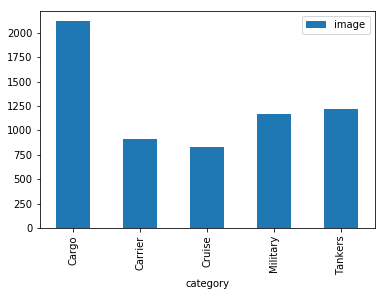

In [34]:
df_train.groupby('category').count().plot(kind='bar')

## Move the files to test folder

In [28]:
os.makedirs(PATH/'test',exist_ok=True)

In [61]:
test_img=[]
for i in range(len(df_test)):
    test_img.append(df_test.image.loc[i])

In [60]:
path = f'{PATH}/images/'
moveto = f'{PATH}/test/'
#files = test_pos
#files.sort()
for f in test_img:
    #print(str(f))
    src = path+f
    dst = moveto+f
   # print(f)
    shutil.move(src,dst)

In [13]:
len(os.listdir(path)),len(os.listdir(moveto))

NameError: name 'path' is not defined

In [12]:
PATH/'images'

PosixPath('data/images')

In [13]:
PATH

PosixPath('data')

## For train images

In [15]:
size_d={k: PIL.Image.open(PATH/'images'/k).size for k in os.listdir(PATH/'images')}

In [16]:
col_sz,row_sz=list(zip(*size_d.values()))
row_sz=np.array(row_sz)
col_sz=np.array(col_sz)

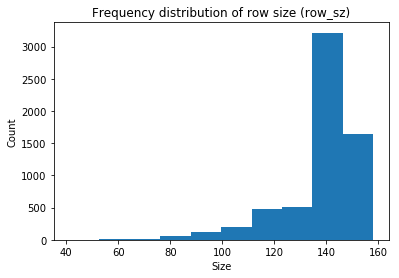

In [17]:
plt.hist(row_sz)
plt.title('Frequency distribution of row size (row_sz)')
plt.xlabel('Size');plt.ylabel('Count')
plt.show()

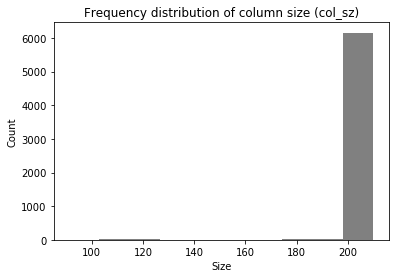

In [18]:
plt.hist(col_sz,color='gray')
plt.title('Frequency distribution of column size (col_sz)')
plt.xlabel('Size');plt.ylabel('Count')
plt.show()

In [19]:
PATH

PosixPath('data')

In [20]:
# Let us resize it column =150 and row=210
def resize_img(file):
    os.makedirs(PATH/'train_resized',exist_ok=True)
    img=cv2.imread(str(PATH)+'/images/'+file, cv2.IMREAD_UNCHANGED)
    resized=cv2.resize(img,(210, 150), interpolation = cv2.INTER_AREA)
    cv2.imwrite(str(PATH)+'/train_resized/'+file,resized)

In [21]:
for img in os.listdir(PATH/'images'):
    if img.endswith('.jpg'):
        resize_img(img)
    else:
        None    

## For test images

In [23]:
size_d={k: PIL.Image.open(PATH/'test'/k).size for k in os.listdir(PATH/'test/')}

In [24]:
col_sz,row_sz=list(zip(*size_d.values()))
row_sz=np.array(row_sz)
col_sz=np.array(col_sz)

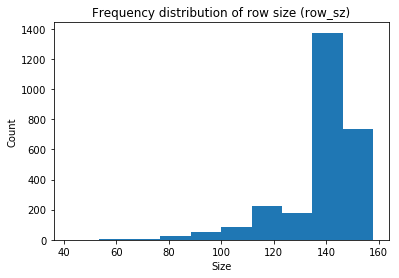

In [25]:
plt.hist(row_sz)
plt.title('Frequency distribution of row size (row_sz)')
plt.xlabel('Size');plt.ylabel('Count')
plt.show()

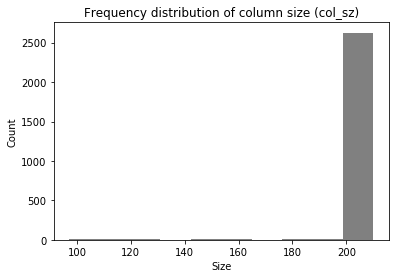

In [26]:
plt.hist(col_sz,color='gray')
plt.title('Frequency distribution of column size (col_sz)')
plt.xlabel('Size');plt.ylabel('Count')
plt.show()

In [27]:
# Test images are of similar distribution, let us resize
# Let us resize it column =210 and row=150
def resize_img(file):
    os.makedirs(PATH/'test_resized',exist_ok=True)
    img=cv2.imread(str(PATH)+'/test/'+file, cv2.IMREAD_UNCHANGED)
    resized=cv2.resize(img,(210, 150), interpolation = cv2.INTER_AREA)
    cv2.imwrite(str(PATH)+'/test_resized/'+file,resized)


In [28]:
for img in os.listdir(PATH/'test'):
    if img.endswith('.jpg'):
        resize_img(img)
    else:
        None  

In [55]:
len(os.listdir(PATH/'train_resized'))

6252

## Create Data block (Try with half size)

In [4]:
tfms=get_transforms(max_rotate=20,max_zoom=1.3,p_lighting=.8,
                    xtra_tfms=[cutout(n_holes=(1,4), length=(5, 10), p=.75), jitter(magnitude=0.005, p=.25)])

In [5]:
img=open_image(PATH/'train_resized'/os.listdir(PATH/'train_resized')[1])

In [6]:
img.shape

torch.Size([3, 150, 210])

In [6]:
src_size=np.array(img.shape[1:]);src_size

array([150, 210])

In [7]:
np.random.seed(42)
src = (ImageList.from_csv(PATH, 'train.csv', folder='train_resized')
       .split_by_rand_pct(0.001)
       .label_from_df(label_delim=' ')
      .add_test_folder('test_resized'))

In [86]:
'''
train_il = ImageList.from_df(df=df_train, cols='image', path=PATH/'train_resized')
test_il = ImageList.from_df(df=df_test, cols='image', path=PATH/'test_resized')

In [87]:
'''
np.random.seed(42)
src = (train_il
        .split_by_rand_pct(0.2)
        .label_from_df(cols='category')
        .add_test(test_il))

In [42]:
'''
np.random.seed(42)
src = (ImageList.from_df(df=df_train, cols='image', path=PATH/'images')
       .split_by_rand_pct(0.2)
       .label_from_df(cols='category')
      .add_test_folder('test_resized'))

In [8]:
data = (src.transform(tfms, size=src_size//2)
        .databunch(bs=256).normalize(imagenet_stats))        

In [9]:
data.classes

['1', '2', '3', '4', '5']

In [12]:
data

ImageDataBunch;

Train: LabelList (6246 items)
x: ImageList
Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (6 items)
x: ImageList
Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105)
y: EmptyLabelList
,,,,
Path: data

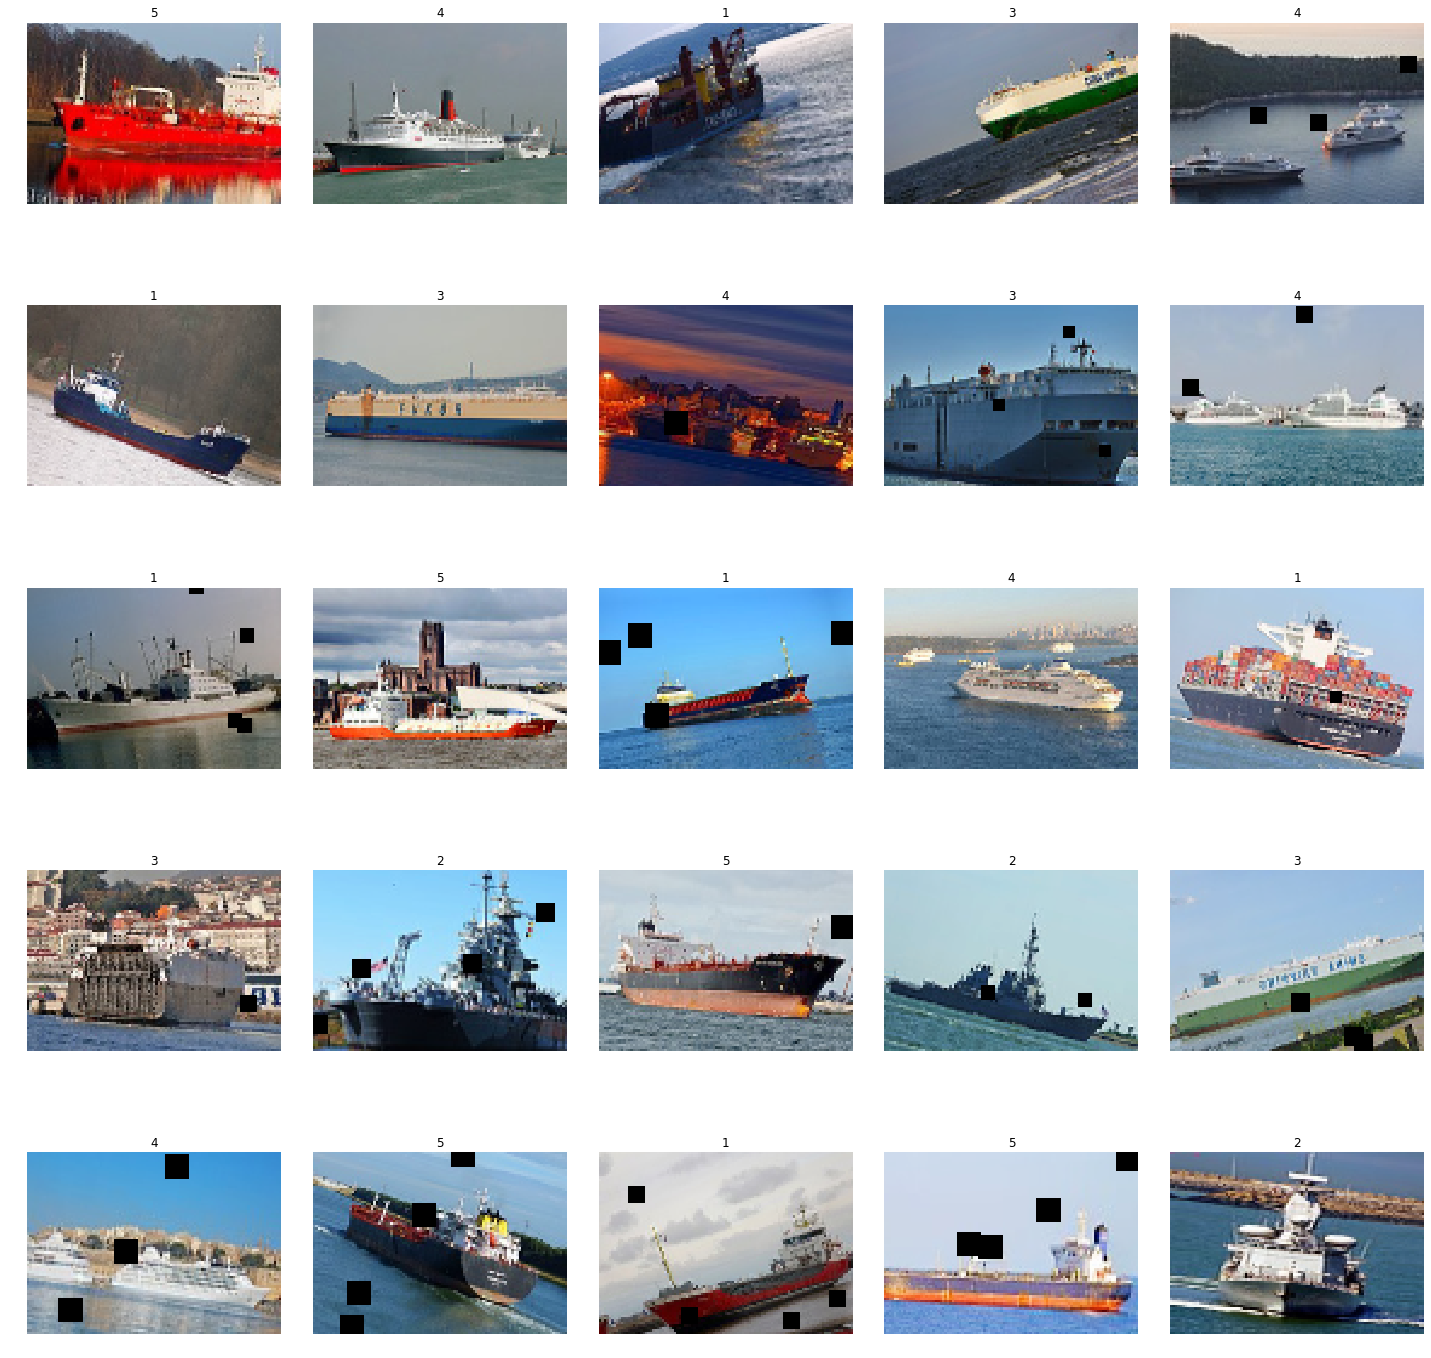

In [25]:
data.show_batch()

## Try with ResNET 18

In [91]:
#f1 = partial(fbeta, thresh=0.2, beta = 1)

In [10]:
metrics_custom=[fbeta,accuracy_thresh]

In [12]:
learn=cnn_learner(data,models.resnet18,metrics=metrics_custom)

In [13]:
stage1_rn18_data_call_back=[CSVLogger(learn=learn, filename='rn18-stage1-history'), ShowGraph(learn=learn),
                       EarlyStoppingCallback(learn=learn,monitor='fbeta', min_delta=0.001, patience=3),
                          SaveModelCallback(learn,monitor='fbeta', mode='max',name='rn_18_best_stage-1-aug'),
                          PeakMemMetric(learn)]

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


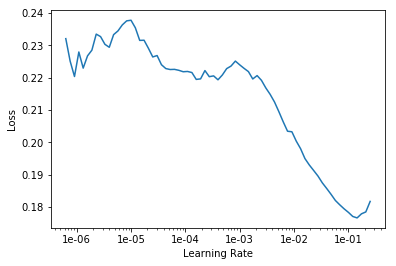

In [16]:
learn.recorder.plot()

In [17]:
lr=2e-2

In [18]:
learn.loss_func

FlattenedLoss of BCEWithLogitsLoss()

In [14]:
learn.load('rn_18_best_stage-4-aug')

Learner(data=ImageDataBunch;

Train: LabelList (6246 items)
x: ImageList
Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (6 items)
x: ImageList
Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105)
y: EmptyLabelList
,,,,
Path: data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding

In [19]:
learn.freeze()

In [20]:
learn.fit_one_cycle(10,slice(lr)).mixup().to_f16()

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.189188,0.993818,0.500000,0.800000,00:04
1,0.145643,0.720176,0.500000,0.800000,00:04
2,0.123052,0.692030,0.500000,0.800000,00:05
3,0.108523,0.592498,0.500000,0.800000,00:04
4,0.100230,0.671528,0.638889,0.800000,00:05
5,0.094122,0.733204,0.500000,0.800000,00:05
6,0.088882,0.718887,0.500000,0.800000,00:05
7,0.085306,0.776808,0.500000,0.800000,00:05
8,0.079507,0.709735,0.500000,0.800000,00:05
9,0.077179,0.692941,0.500000,0.800000,00:05


AttributeError: 'NoneType' object has no attribute 'mixup'

In [21]:
pred,y=learn.get_preds(ds_type=DatasetType.Test)

In [22]:
pred_tta,y_tta=learn.TTA(ds_type=DatasetType.Test)

In [28]:
preds = np.argmax(pred, 1)
a=array(preds)

In [24]:
test_img_names = [Path(i).name for i in learn.data.test_ds.x.items]

In [30]:
submission = pd.DataFrame({'image': test_img_names, 'category': a+1})

In [31]:
submission.to_csv(PATH/'submission_resnet18_noval_half_wotta_freeze.csv',index=False)

In [32]:
preds = np.argmax(pred_tta, 1)
a=array(preds)
submission = pd.DataFrame({'image': test_img_names, 'category': a+1})
submission.to_csv(PATH/'submission_resnet18_noval_half_tta_freeze.csv',index=False)

#### f1 score tta=0.92, wo tta=0.89

In [34]:
learn.unfreeze()

In [35]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


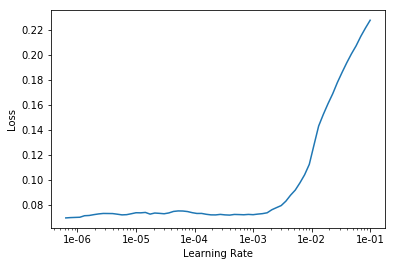

In [36]:
learn.recorder.plot()

In [37]:
lr=1e-4

In [71]:
stage2_rn18_call_back=[CSVLogger(learn=learn, filename='rn18-stage2-history'), ShowGraph(learn=learn),
                       EarlyStoppingCallback(learn=learn,monitor='fbeta', min_delta=0.001, patience=5),
                          SaveModelCallback(learn,monitor='fbeta', mode='max',name='rn_18_best_stage-2-aug'),
                          PeakMemMetric(learn)]

In [38]:
learn.fit_one_cycle(10,slice(lr,3e-2)).mixup().to_f16()

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.077332,0.663412,0.500000,0.800000,00:05
1,0.084163,0.574106,0.638889,0.800000,00:04
2,0.098034,0.468861,0.777778,0.800000,00:04
3,0.101314,0.364331,0.638889,0.866667,00:04
4,0.100277,0.341852,0.666667,0.900000,00:04
5,0.097587,0.607274,0.500000,0.800000,00:05
6,0.084788,0.596666,0.638889,0.800000,00:04
7,0.071796,0.521449,0.638889,0.800000,00:04
8,0.060308,0.742142,0.500000,0.800000,00:05
9,0.052563,0.652414,0.500000,0.800000,00:04


AttributeError: 'NoneType' object has no attribute 'mixup'

## Pass full size image

In [39]:
data = (src.transform(tfms, size=src_size)
        .databunch(bs=128).normalize(imagenet_stats))

In [33]:
learn=learn.load('rn_34_best_stage-2-aug')

In [28]:
model_summary(learn)

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 75, 105]        9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 75, 105]        128        True      
______________________________________________________________________
ReLU                 [64, 75, 105]        0          False     
______________________________________________________________________
MaxPool2d            [64, 38, 53]         0          False     
______________________________________________________________________
Conv2d               [64, 38, 53]         36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 38, 53]         128        True      
______________________________________________________________________
ReLU                 [64, 38, 53]         0          False     
______________________________________________________________

In [40]:
learn.freeze()

In [119]:
model_summary(learn)

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 75, 105]        9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 75, 105]        128        True      
______________________________________________________________________
ReLU                 [64, 75, 105]        0          False     
______________________________________________________________________
MaxPool2d            [64, 38, 53]         0          False     
______________________________________________________________________
Conv2d               [64, 38, 53]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 38, 53]         128        True      
______________________________________________________________________
Conv2d               [64, 38, 53]         36,864     False     
______________________________________________________________

In [41]:
learn.data=data

In [42]:
learn.data

ImageDataBunch;

Train: LabelList (6246 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (6 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: EmptyLabelList
,,,,
Path: data

In [38]:
learn.metrics

[<function fastai.metrics.fbeta(y_pred:torch.Tensor, y_true:torch.Tensor, thresh:float=0.2, beta:float=2, eps:float=1e-09, sigmoid:bool=True) -> <function NewType.<locals>.new_type at 0x7fe3ff0ffea0>>,
 <function fastai.metrics.accuracy_thresh(y_pred:torch.Tensor, y_true:torch.Tensor, thresh:float=0.5, sigmoid:bool=True) -> <function NewType.<locals>.new_type at 0x7fe3ff0ffea0>>]

In [79]:
stage3_rn18_call_back=[CSVLogger(learn=learn, filename='rn18-stage3-history'), ShowGraph(learn=learn),
                       EarlyStoppingCallback(learn=learn,monitor='fbeta', min_delta=0.001, patience=5),
                          SaveModelCallback(learn,monitor='fbeta', mode='max',name='rn_18_best_stage-3-aug'),
                          PeakMemMetric(learn)]

In [43]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


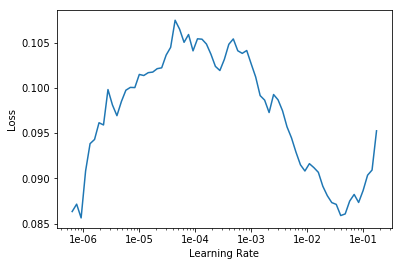

In [44]:
learn.recorder.plot()

In [45]:
lr=3e-3

In [46]:
learn.fit_one_cycle(10,slice(lr)).mixup().to_f16()

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.095525,0.810645,0.500000,0.800000,00:08
1,0.088188,0.606646,0.500000,0.800000,00:08
2,0.076459,0.547917,0.500000,0.800000,00:08
3,0.066469,0.594907,0.500000,0.800000,00:08
4,0.054577,0.565117,0.500000,0.833333,00:08
5,0.052180,0.617559,0.500000,0.833333,00:08
6,0.047045,0.691720,0.500000,0.833333,00:08
7,0.047442,0.656424,0.500000,0.833333,00:08
8,0.045449,0.641487,0.500000,0.833333,00:08
9,0.043935,0.669974,0.500000,0.833333,00:08


AttributeError: 'NoneType' object has no attribute 'mixup'

In [47]:
learn.save('rn18-stage-2-no-val')

In [49]:
pred_tta,y=learn.TTA(ds_type=DatasetType.Test)
preds = np.argmax(pred_tta, 1)
a=array(preds)
submission = pd.DataFrame({'image': test_img_names, 'category': a+1})
submission.to_csv(PATH/'submission_resnet18_noval_full_tta_freeze.csv',index=False)

#### f1 score 0.942901260561996

In [50]:
learn.unfreeze()

In [51]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


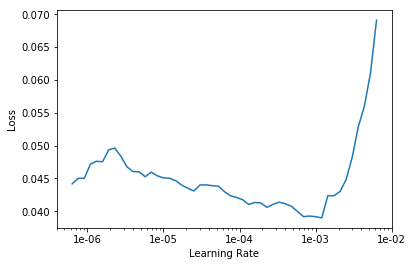

In [52]:
learn.recorder.plot()

In [53]:
lr=1e-4

In [92]:
stage4_rn18_call_back=[CSVLogger(learn=learn, filename='rn18-stage4-history'), ShowGraph(learn=learn),
                       EarlyStoppingCallback(learn=learn,monitor='fbeta', min_delta=0.001, patience=10),
                          SaveModelCallback(learn,monitor='fbeta', mode='max',name='rn_18_best_stage-4-aug'),
                          PeakMemMetric(learn)]

In [54]:
learn.fit_one_cycle(10,slice(lr,9e-3),wd=0.1).mixup().to_f16()

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.039839,0.629082,0.500000,0.800000,00:08
1,0.037879,0.588184,0.638889,0.866667,00:08
2,0.047953,0.896631,0.500000,0.800000,00:08
3,0.051291,1.185405,0.500000,0.800000,00:08
4,0.044382,0.929317,0.638889,0.800000,00:08
5,0.037824,1.198930,0.500000,0.800000,00:08
6,0.028230,0.771668,0.666667,0.866667,00:08
7,0.019138,1.041808,0.638889,0.800000,00:08
8,0.014664,0.941071,0.638889,0.866667,00:08
9,0.011248,0.949527,0.638889,0.800000,00:08


AttributeError: 'NoneType' object has no attribute 'mixup'

In [55]:
learn.save('rn18-noval-stage-4')

In [56]:
pred_tta,y=learn.TTA(ds_type=DatasetType.Test)
preds = np.argmax(pred_tta, 1)
a=array(preds)
submission = pd.DataFrame({'image': test_img_names, 'category': a+1})
submission.to_csv(PATH/'submission_resnet18_noval_full_tta_unfreeze.csv',index=False)

##### f1  0.959871834027549

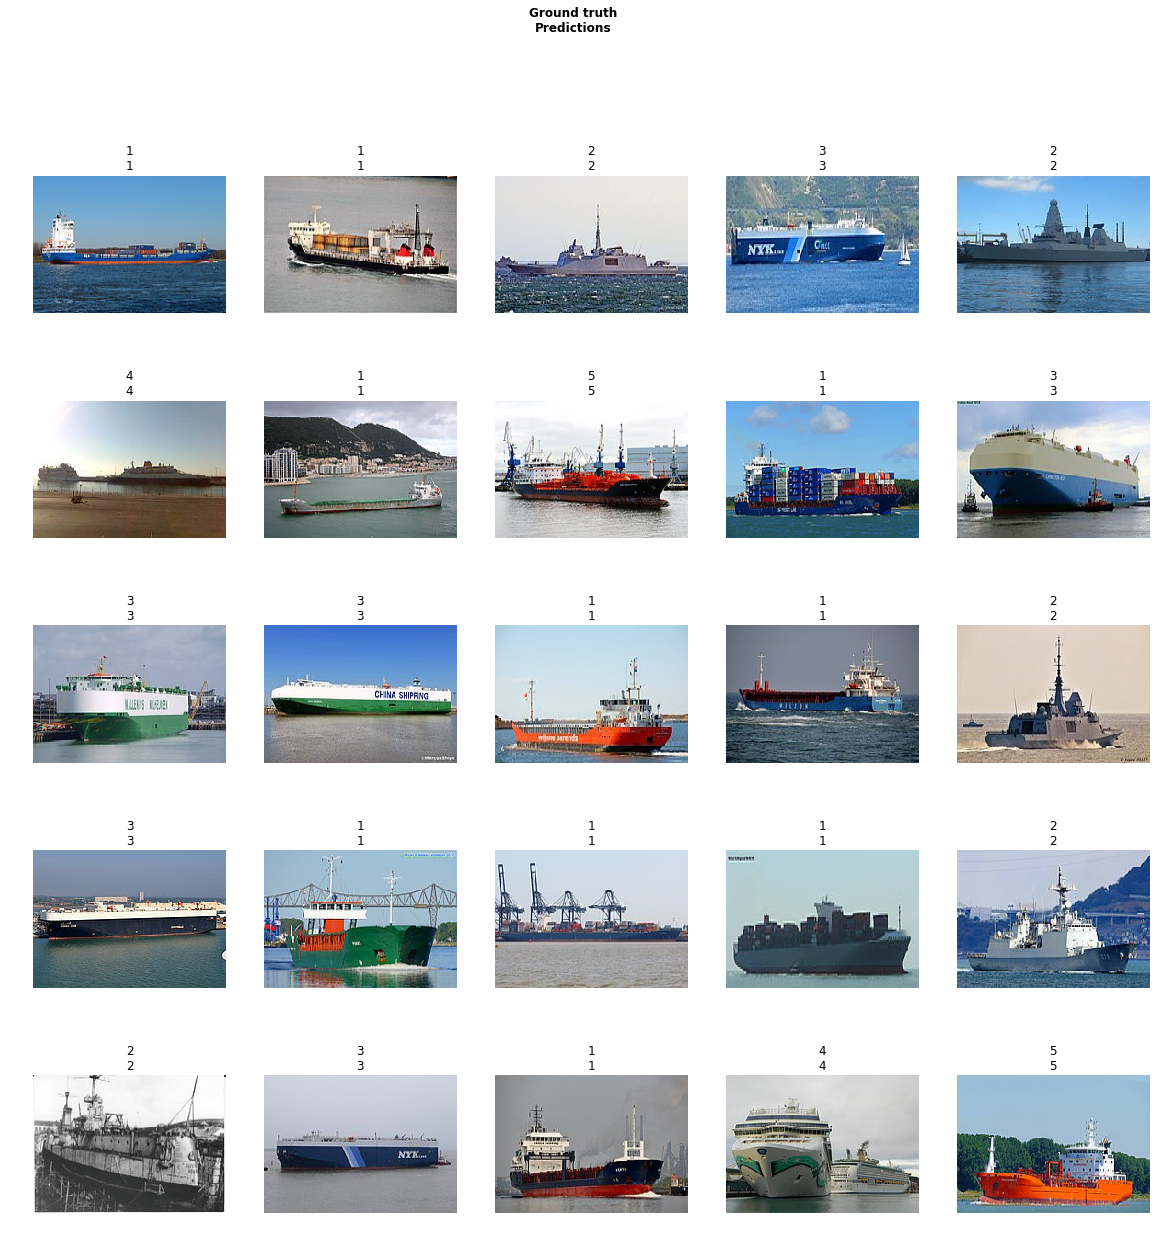

In [139]:
learn.show_results(3)

In [140]:
interp=ClassificationInterpretation.from_learner(learn,ds_type=DatasetType.Valid)

In [145]:
data

ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: EmptyLabelList
,,,,
Path: data

In [147]:
losses,idxs = interp.top_losses()

In [148]:
len(data.valid_ds)==len(losses)==len(idxs)

False

In [153]:
pred_v,y,losses=learn.TTA(ds_type=DatasetType.Valid,with_loss=True)

In [42]:
test_pred_tta=learn.TTA(ds_type=DatasetType.Test)

In [43]:
test_pred_tta

(tensor([[9.9793e-01, 1.3949e-04, 1.8607e-04, 1.0758e-03, 2.2599e-04],
         [1.3303e-05, 3.5994e-04, 9.9966e-01, 4.0263e-05, 9.0592e-06],
         [4.9281e-01, 1.0527e-01, 3.2585e-03, 2.7409e-01, 6.2292e-02],
         ...,
         [1.9659e-03, 7.7302e-04, 9.8322e-01, 7.9465e-04, 1.4220e-02],
         [2.2172e-04, 9.9969e-01, 1.7165e-05, 1.7018e-05, 1.6015e-05],
         [9.9877e-01, 2.6184e-05, 2.4887e-05, 1.0379e-05, 1.0686e-03]]),
 tensor([0, 0, 0,  ..., 0, 0, 0]))

In [44]:
preds = np.argmax(test_pred_tta[0], 1)
preds

tensor([0, 2, 0,  ..., 2, 1, 0])

In [45]:
a=array(preds)

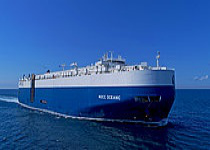

In [46]:
data.test_ds.x[1]

In [47]:
test_img_names = [Path(i).name for i in learn.data.test_ds.x.items]

In [48]:
submission = pd.DataFrame({'image': test_img_names, 'category': a+1})
submission.head(10)

,image,category
0,2904735.jpg,1
1,2890616.jpg,3
2,2902677.jpg,1
3,2741468.jpg,4
4,2802610.jpg,5
5,1630950.jpg,4
6,2882184.jpg,3
7,2787793.jpg,2
8,2866032.jpg,1
9,2369442.jpg,2


In [49]:
len(submission)

2680

In [50]:
submission.to_csv(PATH/'submission_resnet18_noval.csv',index=False)

In [173]:
PATH.ls()

[PosixPath('data/test_ApKoW4T.csv'),
 PosixPath('data/images'),
 PosixPath('data/models'),
 PosixPath('data/sample_submission_ns2btKE.csv'),
 PosixPath('data/test_resized'),
 PosixPath('data/train.csv'),
 PosixPath('data/train_resized'),
 PosixPath('data/submission_resnet50.csv'),
 PosixPath('data/.ipynb_checkpoints'),
 PosixPath('data/test'),
 PosixPath('data/rn50-stage3-history.csv'),
 PosixPath('data/rn50-stage1-history.csv'),
 PosixPath('data/rn50-stage4-history.csv'),
 PosixPath('data/rn50-stage2-history.csv')]